<a href="https://colab.research.google.com/github/122BT0251/Anu-Priya/blob/main/placement_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [4]:
df=pd.read_csv("/content/placement.csv")

In [5]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [7]:
df=df.iloc[:,1:]

In [8]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
#steps
#1. preprocess + EDA + Feature selection
#2. Extract input and output cols
#3. Scale the values
#4. Train test split
#5. Train the model
#6. Evaluate the model / model selection
#7. Deploy the model

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [13]:
import matplotlib.pyplot as plt

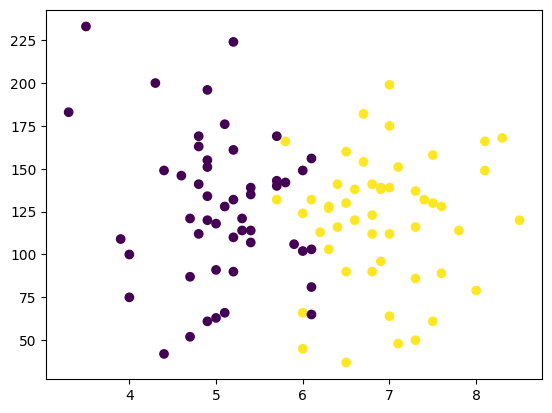

In [17]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [52]:
x = df.iloc[:,0:2]

In [53]:
y = df.iloc[:,-1]

In [54]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [55]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [56]:
y.shape

(100,)

In [57]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [58]:
x_train

,cgpa,iq
0,6.8,123.0
15,5.1,176.0
61,7.3,137.0
1,5.9,106.0
29,7.0,112.0
...,...,...
76,4.9,155.0
74,6.7,154.0
50,3.5,233.0
63,6.3,128.0


In [59]:
y_train

,placement
0,1
15,0
61,1
1,0
29,1
...,...
76,0
74,1
50,0
63,1


In [60]:
x_test

,cgpa,iq
81,5.4,107.0
54,6.4,141.0
16,5.2,224.0
8,6.1,156.0
37,8.1,149.0
5,7.1,48.0
42,7.6,89.0
6,5.7,143.0
48,6.6,138.0
91,7.5,158.0


In [61]:
y_test

,placement
81,0
54,1
16,0
8,0
37,1
5,1
42,1
6,0
48,1
91,1


In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(x_train)

In [65]:
X_train

array([[ 0.76610807,  0.01852677],
       [-0.725171  ,  1.37810684],
       [ 1.20471956,  0.37766113],
       [-0.02339261, -0.41756495],
       [ 0.94155267, -0.26365022],
       [-0.9006156 ,  1.89115592],
       [-0.8128933 , -0.1097355 ],
       [ 0.32749658, -0.49452231],
       [-0.5497264 , -0.21234531],
       [-0.6374487 ,  0.24939886],
       [ 1.20471956, -0.93061403],
       [-0.11111491,  1.1215823 ],
       [ 2.25738714, -0.05843059],
       [-1.16378249,  0.60853322],
       [-0.19883721,  0.45461849],
       [-0.9006156 , -0.05843059],
       [ 0.15205198, -0.49452231],
       [ 2.08194255,  1.1728872 ],
       [-0.19883721,  1.19853966],
       [-0.11111491,  0.5059234 ],
       [ 1.20471956, -1.85410237],
       [ 0.06432969, -1.44366311],
       [-0.6374487 , -0.82800421],
       [ 1.90649795,  1.1215823 ],
       [ 1.38016416,  0.19809395],
       [ 0.85383037,  0.42896604],
       [ 0.15205198, -1.46931556],
       [ 0.50294118, -0.82800421],
       [ 0.94155267,

In [66]:
y_train

,placement
0,1
15,0
61,1
1,0
29,1
...,...
76,0
74,1
50,0
63,1


In [67]:
X_test = scaler.fit_transform(x_test)

In [68]:
X_test

array([[-1.24715333, -0.63818912],
       [-0.18121031,  0.12853986],
       [-1.46034194,  2.00026061],
       [-0.50099322,  0.46680265],
       [ 1.63089282,  0.30894668],
       [ 0.5649498 , -1.96868942],
       [ 1.09792131, -1.04410447],
       [-0.92737043,  0.17364156],
       [ 0.03197829,  0.0608873 ],
       [ 0.99132701,  0.51190435]])

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
clf = LogisticRegression()

In [73]:
clf.fit(X_train,y_train)

LogisticRegression()

In [76]:
y_pred = clf.predict(X_test)

In [75]:
y_test

,placement
81,0
54,1
16,0
8,0
37,1
5,1
42,1
6,0
48,1
91,1


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [83]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

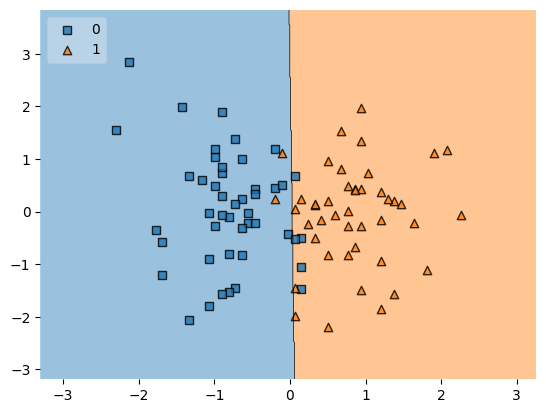

In [84]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)

In [85]:
import pickle

In [86]:
pickle.dump(clf,open('model.pkl','wb'))